[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1131 samples in 0.001s...
[t-SNE] Computed neighbors for 1131 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1131
[t-SNE] Computed conditional probabilities for sample 1131 / 1131
[t-SNE] Mean sigma: 1466.912826
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.359436
[t-SNE] KL divergence after 1000 iterations: 0.292043


/home/kunal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


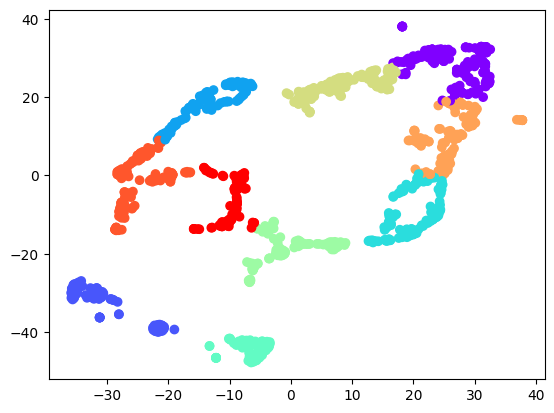

In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('networkEdgesCoverage.csv')

# Extract the numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_data = df[numeric_cols]

# Perform t-SNE embedding using mini-batch optimization
tsne = TSNE(n_components=2, perplexity=30.0, n_jobs=-1, random_state=42, verbose=1, n_iter=1000, learning_rate=50.0)
tsne_embedded = tsne.fit_transform(numeric_data)

# Perform clustering on the t-SNE embeddings
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(tsne_embedded)

# Plot the t-SNE embeddings with different colors for each cluster
plt.scatter(tsne_embedded[:, 0], tsne_embedded[:, 1], c=labels, cmap='rainbow')
plt.show()
